### Imports

In [1]:
import sys
sys.path.append("..")
from src import db_tools as dbt
from src import ds_tools as dst

### Feature Selection

In [2]:
db = dbt.SQLiteDB("../data/data.db")
fs = dst.FeatureSelector(db)

IDs loaded, 150029 rows
Loaded 5 features from set1
Loaded 5 features from set2
Loaded 9 features from set3
Loaded 10 features from set4
Loaded 10 features from set5
All data loaded successfully, shape: (150029, 41)
Found 0 features with missing fraction greater than 0.9
Found 8 features with disbalance fraction greater than 0.9
Found 4 features with correlation coefficient greater than 0.9
Deleted 12 useless features, shape: (150029, 29)
Feature importances calculated, ROC-AUC score 0.7779
Top 14 features exported to file ../model/top_features.json


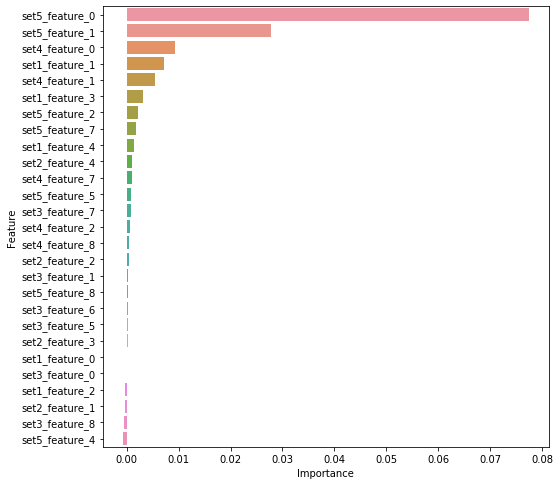

In [3]:
fs.run(source="train", 
       filename="../model/top_features.json",
       target_column="target", 
       id_column="client_id",
       missing_threshold=0.9,
       disbalance_threshold=0.9,
       collinear_threshold=0.9, 
       permutation=True,
       permutation_threshold=0.0005,
       silent=False)

### Build Model

In [2]:
db = dbt.SQLiteDB("../data/data.db")
mb = dst.ModelBuilder(db, random_state=5)

In [3]:
params = {
    'num_leaves': (10, 20), 
    'num_iterations': (80, 600),
    'min_data_in_leaf': (100, 400),
    'max_depth': (8, 15), 
    'bagging_fraction': (0.6, 0.9),
    'feature_fraction': (0.6, 1.0),
    'max_bin': (500, 1200),
    'colsample_bytree': (0.7, 0.9),
    'learning_rate': (.01, .5), 
    'subsample': (0.6, 0.9), 
    'min_gain_to_split': (.01, .03)
}

Loading data ...
IDs loaded, 150029 rows
Loaded 3 features from set1
Loaded 1 features from set2
Loaded 1 features from set3
Loaded 4 features from set4
Loaded 5 features from set5
All data loaded successfully, shape: (150029, 16)
Categorical features not found
Holdout created, train shape: (120023, 16), holdout shape: (30006, 16)
Optimizing params ...
|   iter    |  target   | baggin... | colsam... | featur... | learni... |  max_bin  | max_depth | min_da... | min_ga... | num_it... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  5        |  0.779    |  0.8959   |  0.8502   |  0.9451   |  0.3802   |  919.0    |  10.5     |  399.7    |  0.02884  |  109.7    |  17.56    |  0.7849   |
|  7        |  0.7814   |  0.7337   |  0.7867   |  0.6549   |  0.2751   |  1.183e+0 |  11.69    |  397.1    |  0.02314  |  92.05    |  14.85    |  0.8042   |
|  8        |

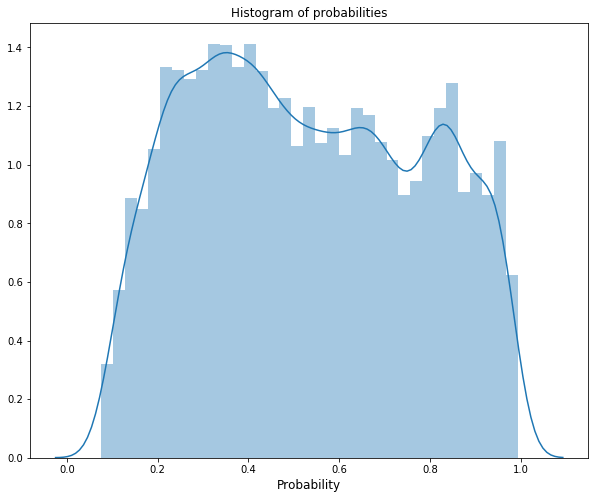

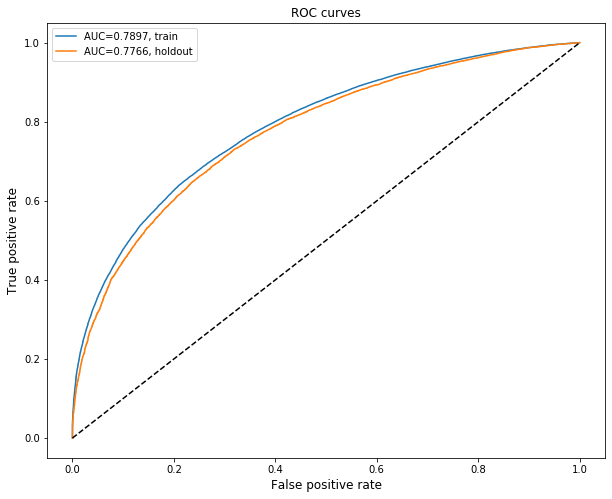

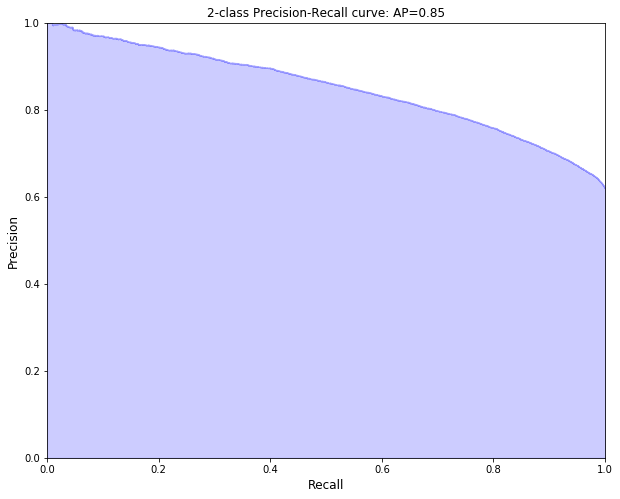

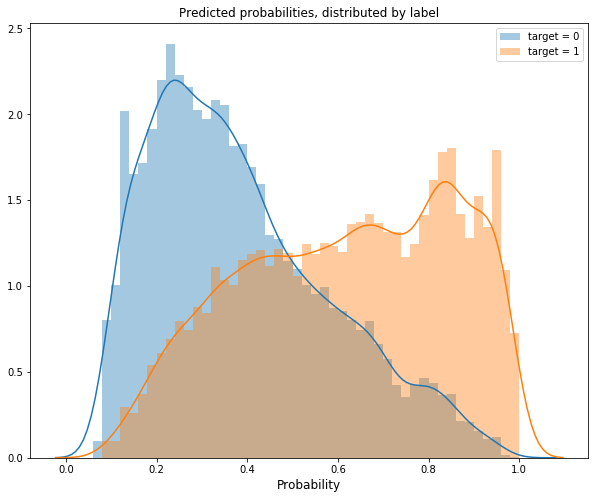

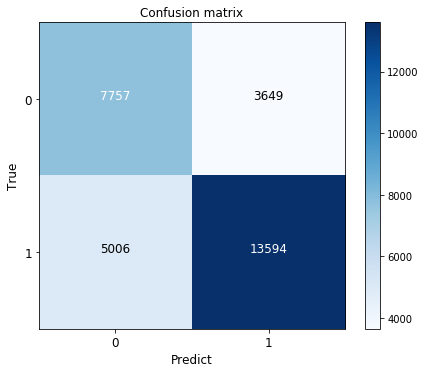

Threshold: 0.45
Precision: 78.8%
Recall: 73.1%
AUC: 70.5%


In [4]:
mb.run(source="train", 
       params=params,
       target_column="target", 
       id_column="client_id", 
       feature_source="../model/top_features.json", 
       encode_filename="../model/cat_dict.npy", 
       na_value=-1,
       holdout_size=0.2, 
       cv_splits=4, 
       init_points=5, 
       n_iter=100, 
       cm_threshold=0.45,
       model_filename="../model/model.sav")